<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#图像检测" data-toc-modified-id="图像检测-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>图像检测</a></span><ul class="toc-item"><li><span><a href="#OverFeat算法" data-toc-modified-id="OverFeat算法-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>OverFeat算法</a></span></li><li><span><a href="#Faster-R-CNN(Regions-with-CNN-features)" data-toc-modified-id="Faster-R-CNN(Regions-with-CNN-features)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Faster R-CNN(Regions with CNN features)</a></span></li><li><span><a href="#遮挡目标图像检测方法" data-toc-modified-id="遮挡目标图像检测方法-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>遮挡目标图像检测方法</a></span></li><li><span><a href="#损失函数预处理" data-toc-modified-id="损失函数预处理-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>损失函数预处理</a></span><ul class="toc-item"><li><span><a href="#损失函数" data-toc-modified-id="损失函数-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>损失函数</a></span></li></ul></li></ul></li><li><span><a href="#图像摘要" data-toc-modified-id="图像摘要-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>图像摘要</a></span><ul class="toc-item"><li><span><a href="#NIC图像摘要生成算法" data-toc-modified-id="NIC图像摘要生成算法-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>NIC图像摘要生成算法</a></span></li></ul></li></ul></div>


## 图像检测
图像检测除了需要判断图像内容的类型意外,还需要标定图像中所有目标所在的位置,实际上基于CNN的图像检测算法本质上依旧是解决一个目标类别的分类与位置坐标的回归预测问题.与基于深度学习的分类算法不同,检测算法在训练处理过程中都会会使用深度网络中的<font face='黑体',size=3>某个卷积层</font>的输出结果来表示图像的网格化特征提取结果.图像检测算法在计算损失函数时,输入到损失函数中的基本样本特征是网格子图特征,在预测中,对目标类型判断和位置预测的基本样本特征同样是网络子图特征.
### OverFeat算法
网格对应的原始子图计算区域称为感知域,同一网络的层次越深,特征图对应的感知域越大,一般来说,检测物体的大小应小于感知域的网格大小.
OverFeat算法源于Yann LeCun所领导的实验室,算法对应的原始结构与VGGNet网络非常相似,都是由卷积层\池化层\激活层\全连接层构成的.Overfeat最大的贡献在于提出使用深度卷积网络一次完成分类\定位\检测三个计算机视觉任务.该算法利用深度卷积网络返回的卷积特征图实现图像网格的自动化分类的同时自动提取特征,最终以图像为样本判断目标类别以及预测目标相对于网格中心点的位置.


对于网络的结构，文献给出了两个版本，快速版、精确版，一个精度比较高但速度慢；另外一个精度虽然低但是速度快。以下是高精度版本的网络结构

<img src='https://img-blog.csdn.net/20160304180345216',width='500'>

不同之处在于：(a)作者没有使用局部响应归一化层(激活某个神经元的同时抑制相邻神经元的激活,相当于进行平滑处理,提高了泛化能力)；(b)然后也没有采用重叠池化的方法(即池化窗口的边长大于步长)；(c)在第一层卷积层，stride,作者是选择了2，这个与AlexNet不同(AlexNet选择的strides是4，在网络中，如果stride选择比较大得话，虽然可以减少网络层数，提高速度，但是却会降低精度)。
https://blog.csdn.net/hjimce/article/details/50187881
### Faster R-CNN(Regions with CNN features)
Faster R-CNN同样基于CNN生成卷积网格特征图,然后在扫描窗口中使用<font face='楷体',size=4>多个不同尺度\不同长宽比的锚点子窗口从卷积特征图中使用全连接提取特征</font>用于类别分类和位置预测.最后,基于全连接特征的两个线性模型分别用于实现分类和位置预测.

具体来说,Faster R-CNN算法使用了多个锚点的子窗口提取卷积网格特征.当获取深度CNN网格特征后,Faster R-CNN使用默认3x3的扫描窗口获取卷积网格特征子图,然后将卷积网格特征子图的中心点与锚点子窗口对齐,利用卷积网格特征子图差值生成不同尺寸\长宽比的锚点窗口大小的卷积网格特征子图.接着,对于不同的锚点子窗口插值特征分别使用全连接进一步将卷积特征统一转换为512维的特征.最后使用全连接线性分类器判定目标类别以及预测位置信息.

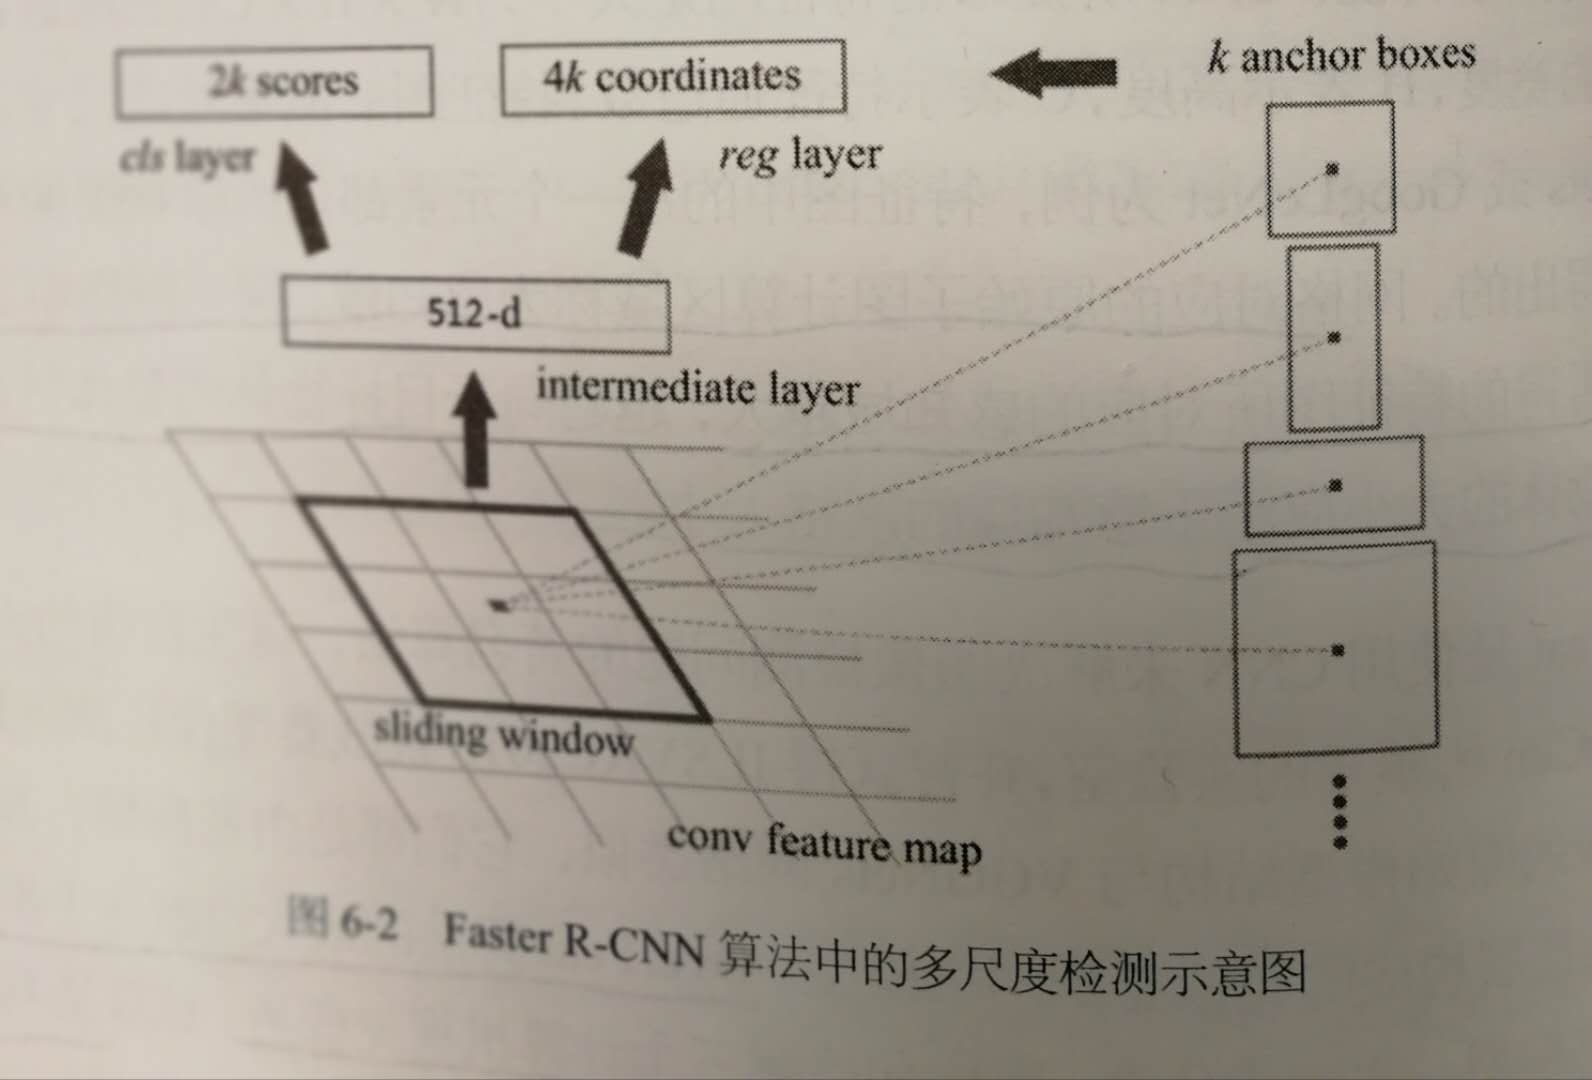

无论是Overfeat算法又或是Faster R-CNN算法,它们最后都会对目标的检测结果的置信度进行排序,<span class="burk">通过两两比较检测结果的重叠面积和置信度</span>,移除掉多余的检测结果,<span class="mark">这种后处理方式在待检测目标结果的重叠区域非常小时是非常有效的</span>,此时即便检测算法在同一个目标区域返回了多个目标结果,<span class="girk">也会根据它们的重叠面积而将其移除</span>.

https://www.cnblogs.com/skyfsm/p/6806246.html

当检测目标存在遮挡时,这种处理方式极可能会移除掉被遮挡目标,若调整重叠面积判断参数,又可能出现大量的重复检测结果.这就是遮挡目标检测问题.
### 遮挡目标图像检测方法
在Overfeat算法的基础上使用LSTM网络能够极大地改进遮挡目标的检测效果.在使用LSTM神经网络后,一个网格卷积特征能够被复用,并产生多个序列特征以表征遮挡图像目标的检测结果.

TensorBox内部同时实现了Overfeat算法与ReInspect(CNN+LSTM)算法.它们都使用GoogLeNet网络结构对图像信息划分网格进行编码,然后以网格卷积特征为基本单元预测网格卷积感知域内的目标及其位置信息.两种算法在tensorbox的内部实现中仅仅是参数设置的区别.从实现的角度来看,Overfeat算法是ReInspect算法的简化版本.

ReInspect算法与Overfeat算法的不同之处在于<font face='楷体',size=4,color='green'>采用了LSTM神经网络和对应的损失函数的预处理操作</font>.因为ReInspect算法采用LSTM网络结构对同一网格生成序列特征表征遮挡目标,这些特征序列的对应样本需要根据训练时的预测结果与真值进行匹配并赋值,以便计算损失函数.例如,网格产生的m个特征序列,对应的原始图像标记有n个目标真值.在训练过程中,m个样本序列对应的目标类型将根据m个样本的预测结果与n个目标真值进行相似匹配产生的.匹配的最大数量为min(m,n),而<font face='楷体',size=4>没有匹配的特征序列则标记为负样本类型,对应的坐标位置填0</font>.另外ReInspect算法采用了一种称为'缝合(stitch)的检测结果后处理方法.

缝合后处理有两大特点,<font face='楷体',size=4>一个特点是同一网格产生的外包矩形检测结果不会进行比较移除,另一个特点是单次缝合操作中,每一个检测结果最多只会移除一个重叠检测结果</font>.这种处理能够确保同一网格卷积特征产生的重叠目标不会被认为是重复检测而被错误地移除.显然,当网格产生的特征序列长度为1时,缝合后处理操作也就是经典的重复检测目标移除后处理算法.

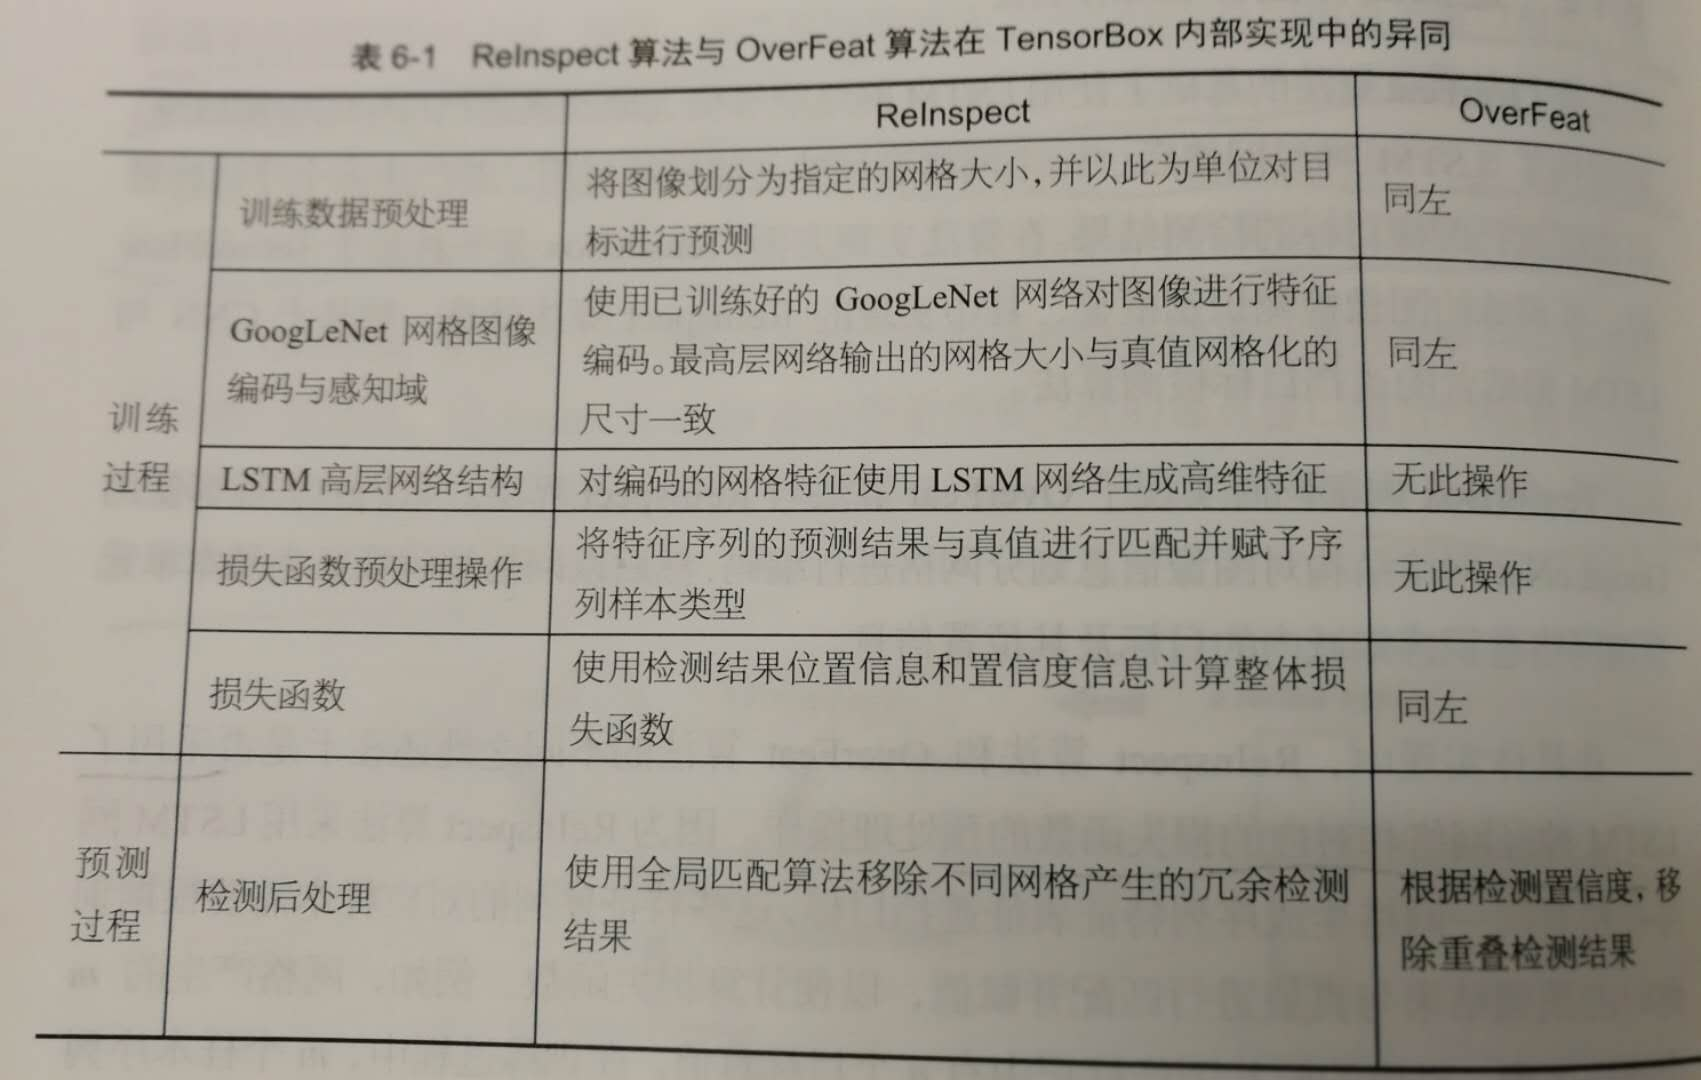

tensorbox

https://github.com/TensorBox/TensorBox

### 损失函数预处理
通过调整循环LSTM网络结构产出特征的标签信息,能够确保特征序列能够正确反映遮挡检测目标.例如,当循环LSTM网络的循环次数为m时,每一个网格将产出m对特征样本和标签信息组成的序列,在训练样本预处理过程中,我们已经确保了检测目标的真值信息优先出现在序列的前面,<font face='楷体',color='green',size=4>但LSTM生成的序列与真值之间并无关联,若网格对应存在n个遮挡目标时,前n个特征序列对应的具体真值信息是没有逻辑关联的.</font>因此,在训练中应考虑特征与真值信息的匹配关系,显然,这是一个二部图问题(二分图又称作二部图，是图论中的一种特殊模型。 设G=(V,E)是一个无向图，如果顶点V可分割为两个互不相交的子集(A,B)，并且图中的每条边（i，j）所关联的两个顶点i和j分别属于这两个不同的顶点集(i in A,j in B)，则称图G为一个二分图。由定义可知，二分图没有自回路；零图，平凡图可以看成是特殊的二分图。).ReInspect算法使用匈牙利算法前n个特征序列与真值之间的匹配,即希望训练时前n个特征序列的预测结果与真值的总体加权匹配损失是最小的.

训练时ReInspect算法会对网格特征序列的预测结果与真值信息进行匹配,并调整预测结果.假设网格最多产生4个特征序列预测结果{1,2,3,4},与该网格对应的目标真值数量为2,通过定义一个[2,4]大小的代价矩阵,从中挑选2个不同行列的元素求和用以表示匹配的代价值.匹配问题就是找出真值信息与检测结果的最小代价的对应关系.匹配距离计算方法如下公式所示$$\Delta (b_i,\tilde{b_j})=(o_{ij},r_j,d_{ij})$$其中,$b_i$表示真值的位置.$\tilde{b_j}$表示特征序列的一个位置预测.$o_{ij}\in \{ 0,1\}$,当$b_i$与$\tilde{b_j}$的重叠区域比例大于阈值时$o_{ij}=0$,否则$o_{ij}=0$.$r_j$表示特征在序列中的序号,越靠前的预测结果匹配代价越小.$d_{ij}表示b_i与\tilde{b_j}$对应区域中心点的距离,距离越小代价越小.<font face='宋体',color='green',size=4>代价函数优先比较$o_{ij},其次比较r_j,最后考量d_{ij}.$</font>

训练时,ReInspect算法包括3种不同的匹配方式.1)一种是匈牙利算法$L_{hung}$,该算法下rnn_len个循环LSTM网络特征预测结果将与n个真值进行匹配,匹配成功的n个网格特征将被赋予目标真值,匹配成功的n个网格特征将被赋予目标真值,剩下的rnn_len-n个网格特征将作为负样本进行训练.2)第二种方法记为$L_{firstk}$,是将n个真值与特征序列中的前n个预测结果进行匈牙利匹配,对前n个特征序列按照匹配结果赋予真值.3)第三种方法是固定检测结果与真值之间的关系,记为$L_{fix}$

#### 损失函数
如同一般的深度学习问题,图像检测算法需要输入大量的训练图像数据通过损失函数计算的反向传播梯度实现模型参数优化,并最终训练得到检测模型.图像检测问题不仅需要判断目标的类型,还需要得出目标的位置信息.因此这一问题实际上是一个关于图像的分类问题和位置信息的逻辑回归问题的组合,在实际应用中额可以使用线性加权的方式来对检测目标的类型和位置进行融合加权.TensorBox所使用的损失函数如下$$L(G,C,f)=\sum_{i\in N}{(\alpha \sum_{i=n}^{|G|}{\frac{l_{pos}(b_{pos}^i,\tilde{b_{pos}^{f(i)}}}{|G|}}+\beta \sum_{j=1}^{|C|}{\frac{l_c(\tilde{b_C^j,y_j}}{|C|}})}$$其中,N表示图像数量,

集合G单张图像标记的目标位置信息集合,网格位置信息数量|G|由原始标注信息与覆盖网格的数量决定.

集合C表示划分的图像网格集合,对于相同尺寸的图像,数值|C|是保持不变的. 

$l_{pos}$表示目标位置信息损失函数,它反映网格标记目标位置坐标值与预测坐标值的差异,为位置向量差的绝对值之和.它有两个输入参数,$b_{pos}^{i}$表示第i个网格真值标记的位置区域信息.$\tilde{b_{pos}^{f(i)}}$表示与对应网格特征的位置预测结果.

$f(i)$用于表示第i个真值位置信息对应的网格区域映射关系.在程序中,$f(i)$由区域的中心点距离所决定.

$l_c$表示网格目标分类信息损失函数,用于度量网格类型与目标类型一致性.它的两个输入参数,$\tilde{b_c^j}$表示网格j特征的分类判断置信度张量.$y_j$表示[0,1]类型标签张量.因每张图像的真值标记区域G数量不同,需要除以该值进行归一化.参数$\alpha和\beta$用于调整位置信息和分类信息损失函数的占比权重.

$$l_{pos} \left( b_{pos}^i,\tilde{b_{pos}^{f(i)}}\right)=sum\left(abs\left(b_{pos}^i-\tilde{b_{pos}^{f(i)}}\right)\right)$$
$$l_c\left(\tilde{b_c^j},y_j\right) =
sum\left(-y_i\cdot log\frac{e^{\tilde{b_c^j}-max(\tilde{b_c^j})}}
{sum\left(e^{\tilde{b_c^j}-max(\tilde{b_c^j})}\right)}\right)$$
位置信息和分类信息损失函数的值分别在不同的量纲范围,这里使用的$\alpha=0.1,\beta=1$为经验值,即强调目标区域的分类判断对最终检测结果的影响是位置信息误差的10倍.由tensorflow源码文件train.py中的build_forward_backward函数可知损失函数中的分类信息由张量confidence_loss表示,位置信息由boxes_loss表示.在程序实现中,初始编码神经网络会填入预先训练好的模型参数,高层自定义网络层次使用均值为0且方差较小的初始权,以此确保网络在初始训练时是易于优化的.

## 图像摘要
图像摘要算法是让计算机自动对图像产生文字描述的程序.主要研究内容包括图像识别和自然语言处理两个方面,一方面需要实现对图像内容的准确提取,另一方面还要实现图像内容的恰当转换.其中,图像内容的准确提取包括图像目标的类型\场景类型\颜色\位置\大小等特征,而图像内容文字转换则需要自动映射图像内容特征与文字特征的关系.

早期的图像摘要算法往往包括多个集成模块,例如图像目标检测,目标外观属性提取,位置信息提取,关联分析,候选单词预测,描述句子生成,但这些方法描述的内容对象只可能是图像检测模块的输出结果,而对物体外观,位置等信息的描述,则都需要人工设定的语言逻辑先验信息来得到,这限制了描述语言的丰富程度.

Oriol Vinyals等提出的NIC算法使用深度学习技术一并解决了这些问题.该方法使用inception_v3网络模型统一提取图像高维特征,然后使用LSTM网络结构实现对图像描述语句的优化.  
简单来说,图像摘要问题的求解过程可以理解为一种概率联合分布的转换模型.对于图像I和其对应的描述样本$[S_{begin},S_1,...,S_{end}]$,训练的目标为图像摘要的最大概率密度函数$P(S_{begin},S_1,...,S_{end}|I)$,这与近年来的机器翻译的实现高度相似,因此借鉴机器翻译算法采用的思路,NIC使用深度图像卷积网络inception_v3作为图像内容的编码器,同时使用LSTM网络作为对图像编码内容生成文字描述的解码器,这就为图像摘要问题提供了体重整体的解决方案.

### NIC图像摘要生成算法
首先NIC算法将图像摘要问题抽象化为一个数字优化问题,如下所示:$${\theta}^*=\underset{\theta}{argmax}\sum_{(I,s)}{logP(S|I,\theta)}$$  其中,$\theta$表示深度神经网络的模型参数,$I$表示图像数据,$S$表示由单词组成的理想文字描述语句.$S$的长度没有限制.可以将该问题进一步转换为使用链式法则求解单个单词的最大联合概率密度.$$logP(S|I,\theta)=\frac{1}{N}\sum_{t=0}^N{logP(S_t|I,\theta,S_0,...,S_{t-1})}$$在训练时,(S,I)构成训练样本的基本单元.整个训练过程就是上述公式最大值的优化过程.联合概率分布$logP(S_t|I,\theta,S_0,...,S_{t-1})$可以很容易地借助循环神经网络隐含层$h_{t-1}$模拟实现.在网络模型内部隐含状态层$h_t$由输入数据$x_{t-1}$,上一时刻状态层$h_{t-1}$共同决定,即$$h_t=f(h_{t-1},x_t)$$使用循环神经网络衔接了模型优化的两个关键问题,<span class="girk">一个是可以自定义非线性隐层转换函数$f(h_{t-1},x_t)$,另一个是可以将图像信息和文字信息以序列形式同时组合形成输入数据$x_t$</span>.<font face='楷体',color='green',size=4>NIC算法使用LSTM循环网络作为隐层的变换网络.输入数据由原始图像的特征和描述文本的词向量组合而成.其中图像特征由inception_v3网络处理得到,文本词向量则要通过单词向量化方法得到.单词向量化是一种无监督学习,其目标是将每一个单词都转换为向量表示,并且与语义越接近的单词的向量距离越近.</font>  
由公式$logP(S_t|I,\theta,S_0,...,S_{t-1})$可知,在输入图像和单词序列后,LSTM网络即可实现模型的训练或预测.动态LSTM循环网络很好地利用了LSTM网络的特性．即通过记忆单元的存储，更新策略，最大化拟合图像内容和描述文字的关联性，以及单词之间的语法规则．具体来说，令图像数据表示为I，对于的描述语句单词序列表示为$(S_0,...,S_N)$,则预测单词按照如下公式进行:$$x_{-1}=CNN(I)$$,$$x_t=W_eS_t,t\in \{0,1,...,N-1\}$$,$$P_{t+1}=LSTM(x_t),t\in \{0,1,...,N-1\}$$,其中,CNN此处为inception_v3,图像特征$x_{-1}$作为-1时刻的LSTM网络数据输入,$S_0,S_N$分别表示描述语句的开始和结束标记.$S_t$表示由{0,1}元素组成的类型标签向量.$S_t$的长度总是$|W|$,且仅有一个非零元素.$W_e$表示尺寸为$[|W|,Q]$的二维矩阵,其中Q表示单词向量的长度.图像特征和单词向量特征都映射到相同的特征空间中.
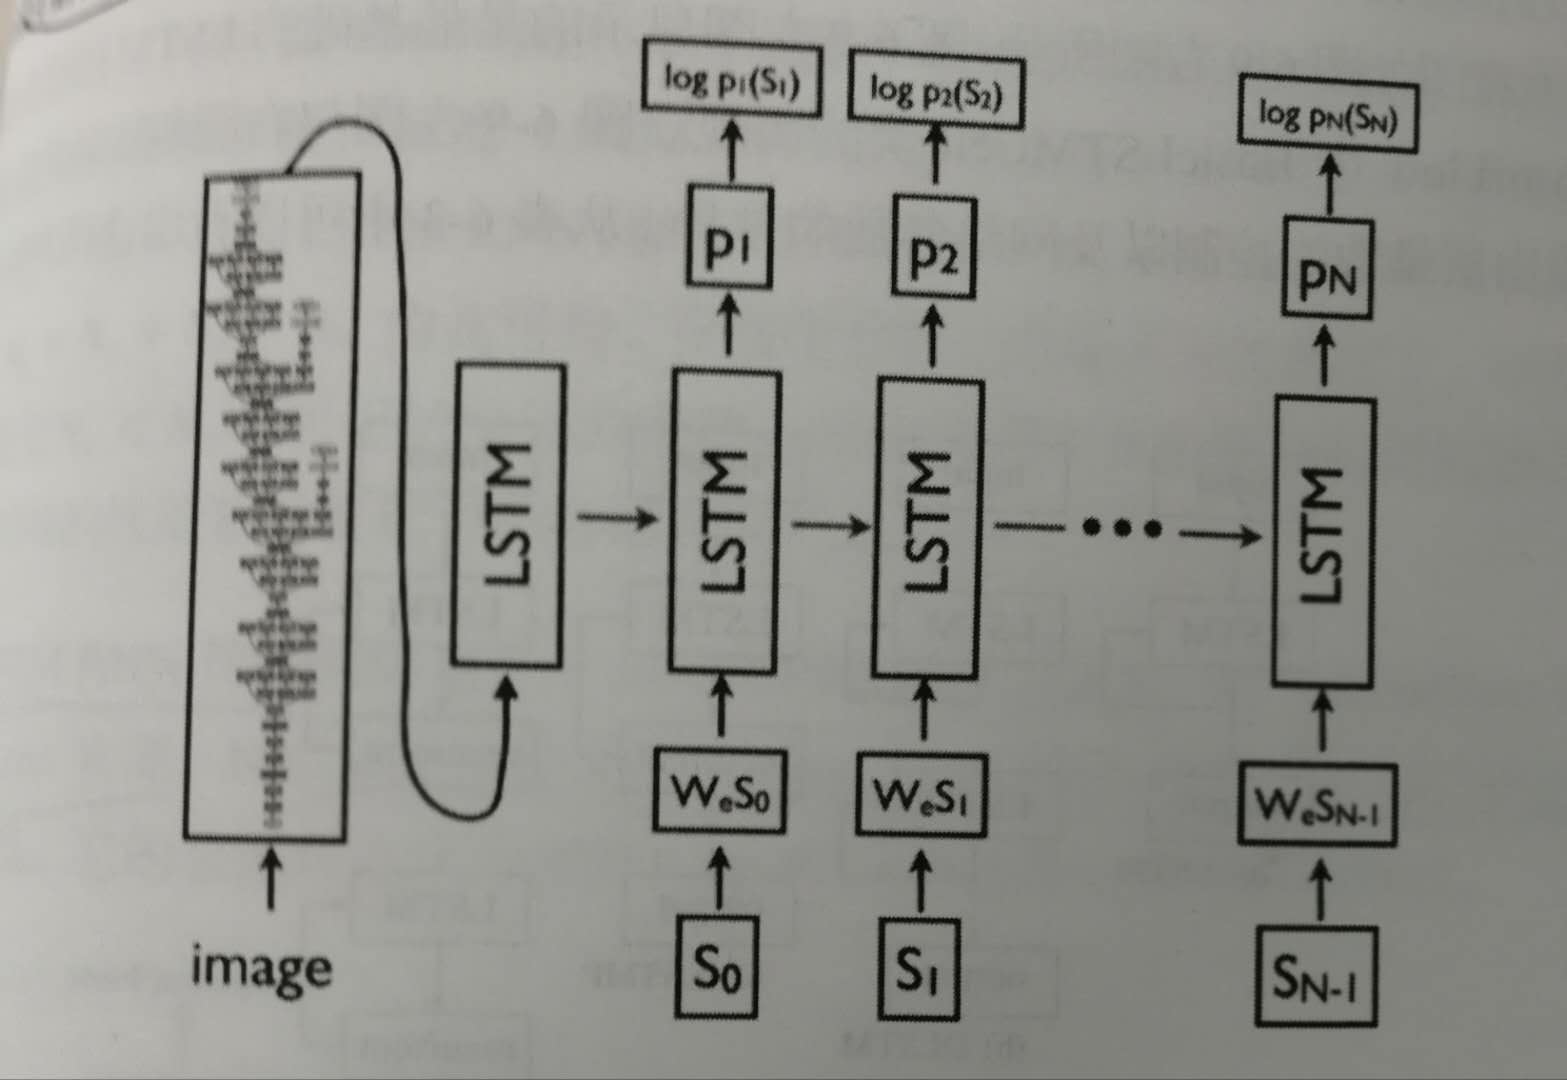



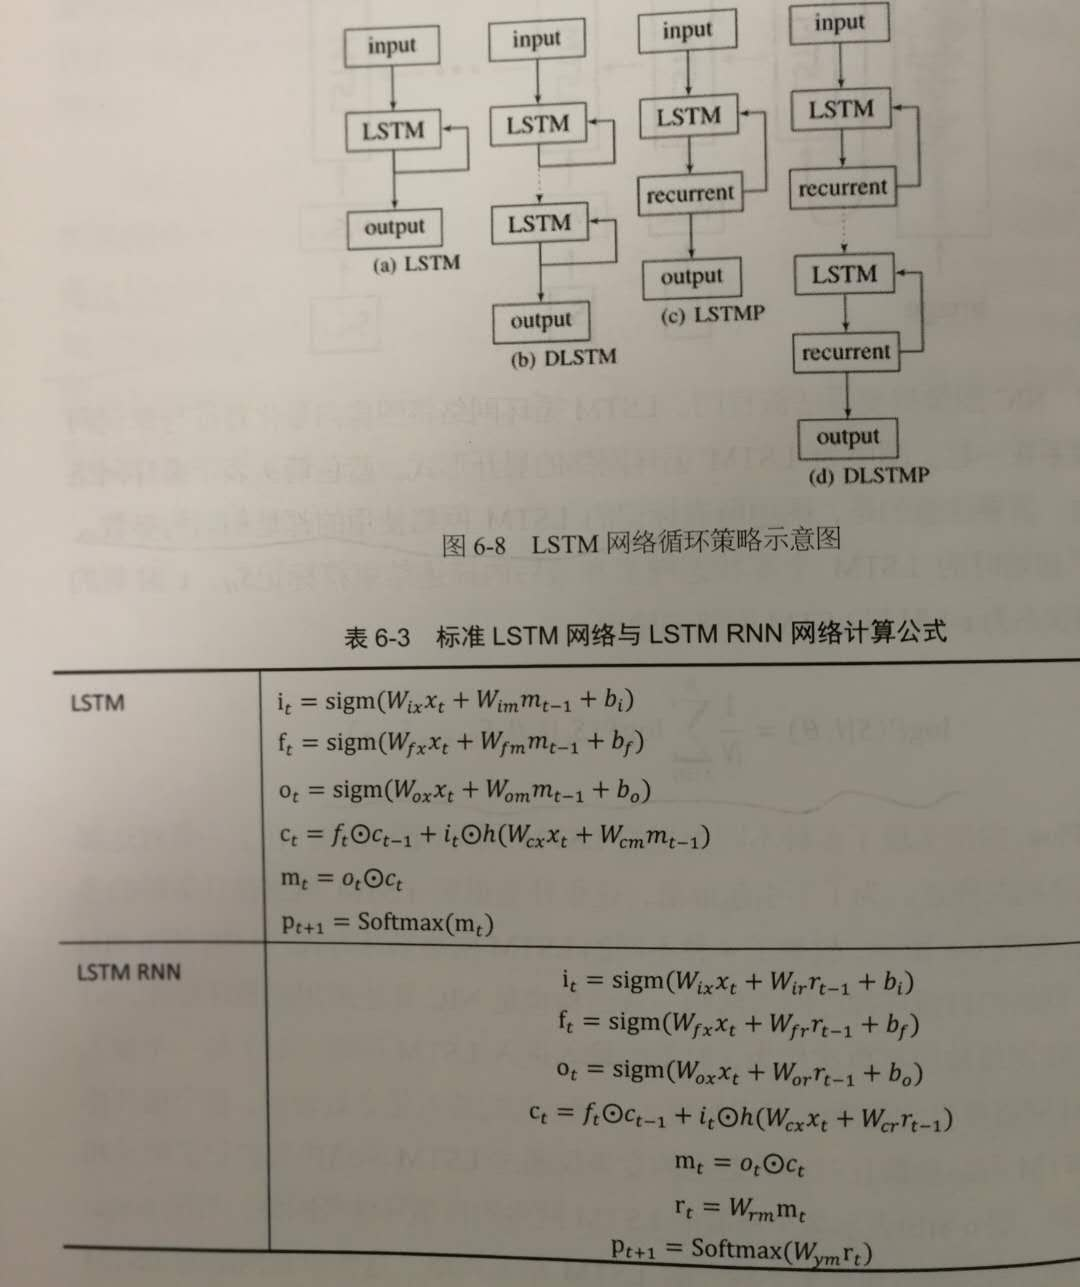
LSTM RNN网络在LSTM的基础上增加了一个全连接层并将结果重新导入到LSTM网络中.这一操作令网络的模型参数数量发生了变化,忽略全连接层的偏移量,标准LSTM网络的参数为$$N=N_C\times N_C\times 4+N_i\times N_C\times 4+N_o\times N_C+N_C\times 3$$而LSTM RNN的网络参数为$$N=N_C\times N_r\times 4+N_r\times N_C\times 4+N_o\times N_r+N_C\times N_r+N_C\times 3$$,故在参数总数量不变的情况下,LSTM　RNN网络可设置$N_r<N_C$增加记忆单元的维数,实践表明在参数数量相同的情况下LSTM　RNN网络的性能整体要优于LSTM．

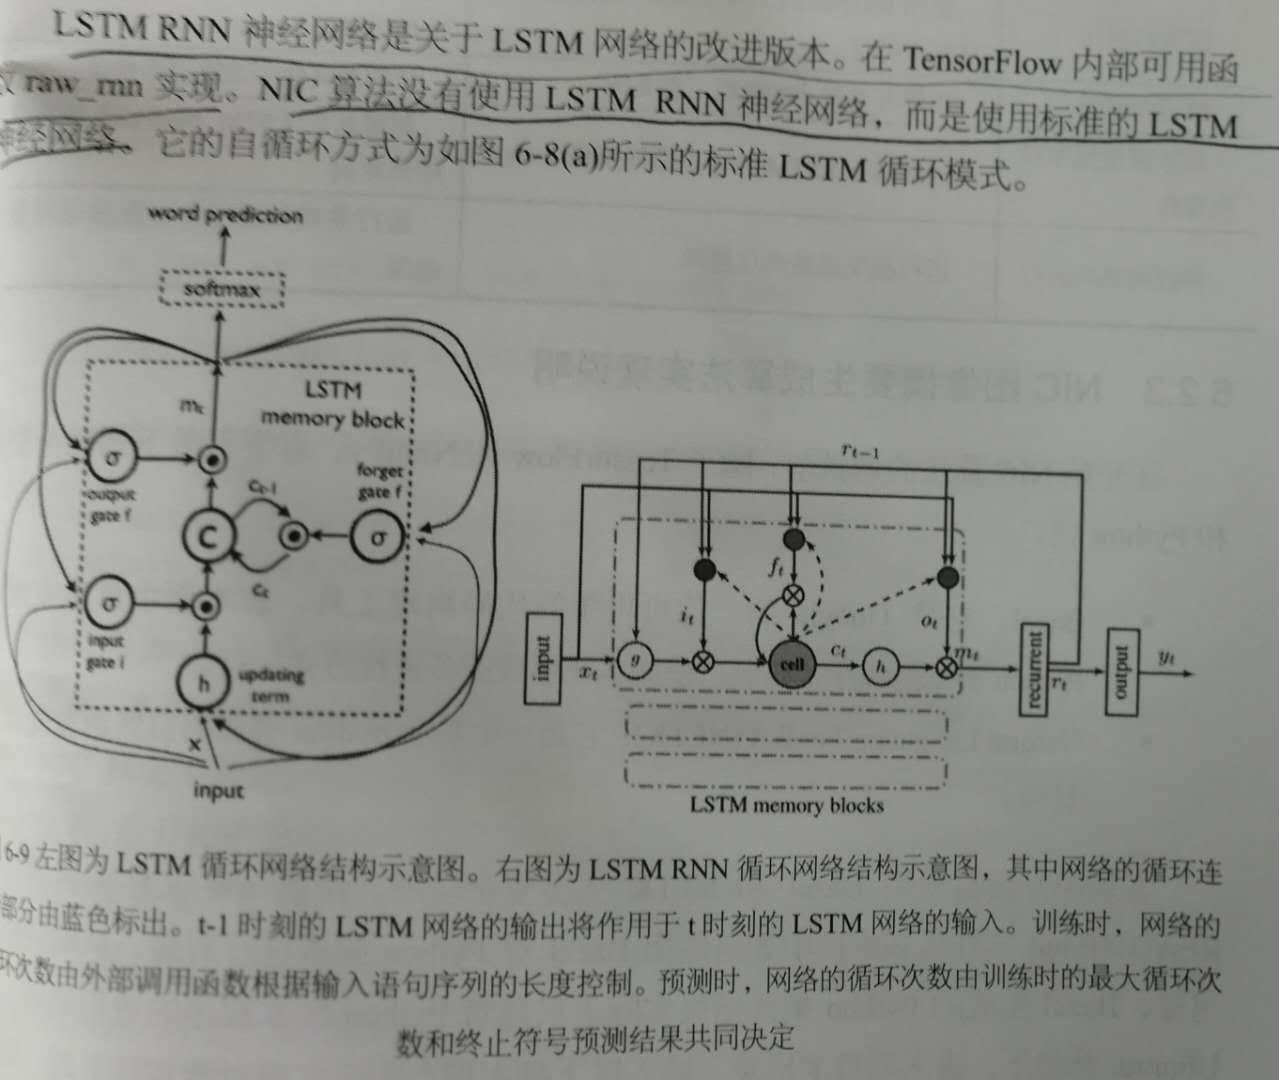
使用NIC算法有两种不同的序列生成方式,第一种称为采样式,可以根据$P(S_t|I,\theta,S_0,...,S_{t-1})$的概率采样生成t时刻的单词,而后在根据$P(S_{t+1}|I,\theta,S_0,...,S_t)$的概率采样生产t+1时刻的单词.直至生成结束标记$S_N$或者达到语句的最大长度.另一种是优化搜索方法,在t时刻考虑该时刻联合置信度最大的k种单词序列生成结果,基于这些结果再往后预测t+1时刻的置信度最大的k种单词序列生成结果.  
NIC算法内部实现如下
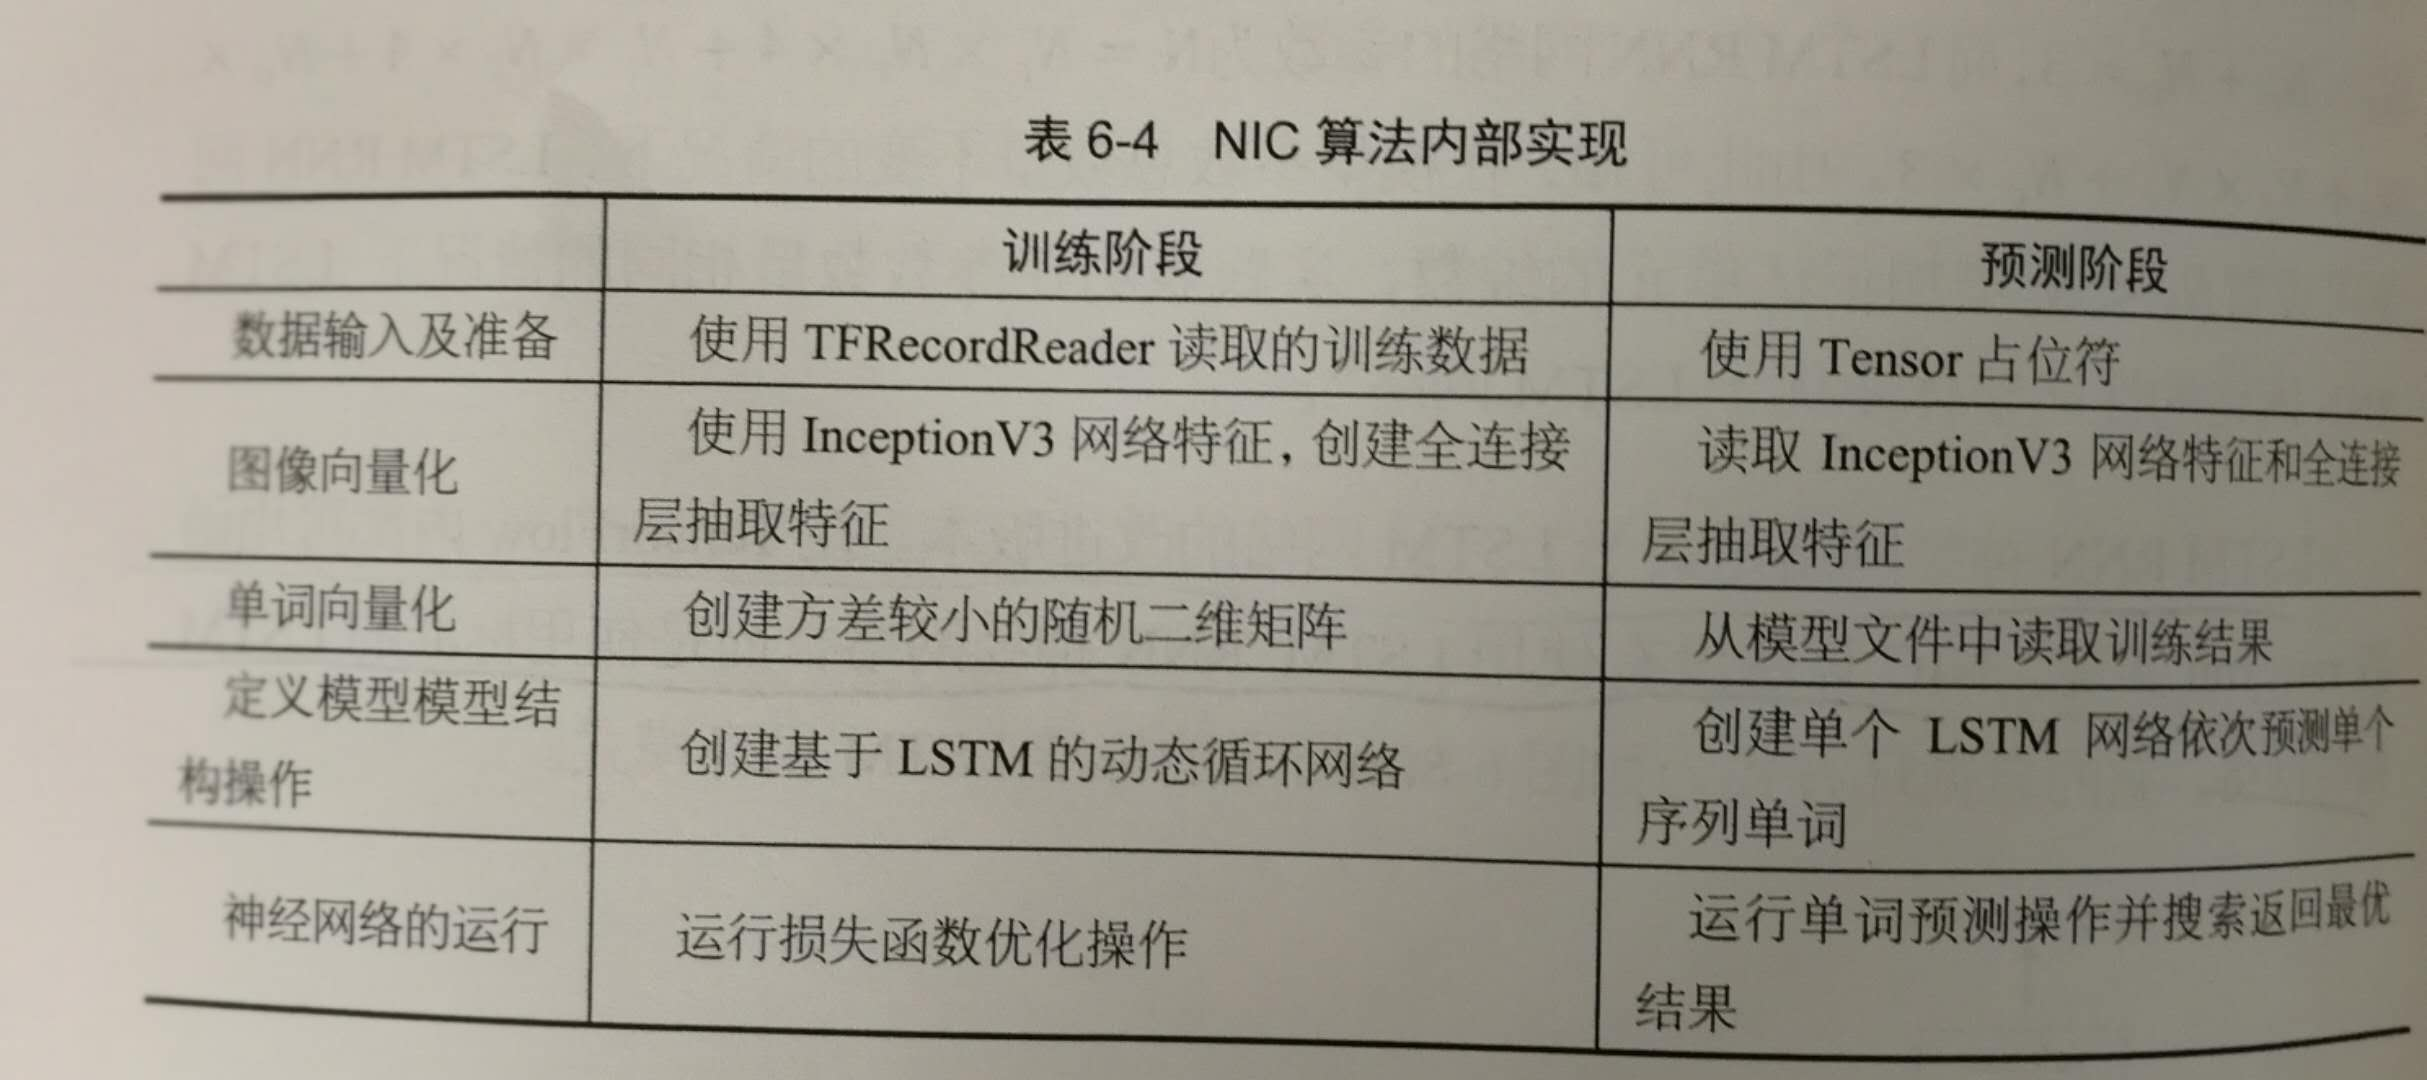